## [Statistical Arbitrage and Pairs Trading with Machine Learning](https://theaiquant.medium.com/statistical-arbitrage-and-pairs-trading-with-machine-learning-875a221c046c)

Statistical arbitrage involves exploiting market inefficiencies by taking advantage of pricing discrepancies between related assets. Pairs trading, on the other hand, involves trading two correlated instruments simultaneously, with the goal of profiting from the relative price movements between them.

By incorporating machine learning algorithms into these trading strategies, traders can improve their decision-making processes, identify profitable opportunities and automate trading execution.

#### Understanding Statistical Arbitrage

Statistical arbitrage is a trading strategy that aims to profit from price inconsistencies of related assets by taking long and short positions in the market. This strategy relies on mathematical models and statistical analysis to identify temporary pricing disparities.

#### Principles of Statistical Arbitrage

Statistical arbitrage is based on the premise that related assets tend to move in a correlated manner over time. When these assets deviate from their typical correlation, there may be an opportunity to profit from the convergence of their prices.

1. **Correlation**: Identifying assets that exhibit a high degree of correlation in their price movements is crucial for statistical arbitrage. This correlation can help traders predict the future movements of these assets.

2. **Mean Reversion**: The concept of mean reversion suggests that prices tend to revert to their long-term average over time. Statistical arbitrage strategies often capitalize on mean-reverting behavior in asset prices.

3. **Stationarity**: Stationarity is the property of a time series where statistical properties such as mean and variance remain constant over time. Stationary time series are essential for implementing statistical arbitrage models.

#### Strategies for Statistical Arbitrage

1. **Pairs Trading**: Pairs trading involves identifying two assets that are historically correlated and taking opposite positions on these assets when their prices diverge. By betting on the convergence of these prices, traders can profit from the relationship between the assets.

2. **Relative Value Arbitrage**: This strategy involves comparing the value of related assets and determining if one asset is overvalued or undervalued relative to another. Traders can then take positions to exploit these pricing differentials.

3. **Index Arbitrage**: Traders can exploit price differences between an index and its components by taking simultaneous positions in the index and individual stocks. This strategy aims to profit from mispricings in the index composition.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Download historical data
data = yf.download(['AAPL', 'MSFT'], start='2021-01-01', end='2021-12-31')

[*********************100%***********************]  2 of 2 completed


In [2]:
data.head()

Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2021-01-04  126.096603  209.273178  130.189064  214.377868  123.514452   
2021-01-05  127.655594  209.475052  128.366914  210.071090  125.141651   
2021-01-06  123.358536  204.043488  127.694603  208.119556  123.144167   
2021-01-07  127.567917  209.849930  128.259745  210.859335  124.586268   
2021-01-08  128.668961  211.128525  129.234112  212.051413  126.895553   

Price                         Open                 Volume            
Ticker            MSFT        AAPL        MSFT       AAPL      MSFT  
Date                                                                 
2021-01-04  206.504526  130.101372  213.926040  143301900  37130100  
2021-01-05  207.360116  125.589879  208.859798   97664900  23823000  
2021-01-06  203.745476  124.449862  203.966579  155088000  35930700  
2021-01-07  205.447026  125.073466  205.764254  109578200  27694500  
2021-01-08  208.638669  129.039221  210.224867  105158200  22956200

In [3]:
data.describe().T

count          mean           std           min           25%  \
Price  Ticker                                                                  
Close  AAPL    251.0  1.377123e+02  1.439748e+01  1.135501e+02  1.256435e+02   
       MSFT    251.0  2.662934e+02  3.618312e+01  2.040435e+02  2.349704e+02   
High   AAPL    251.0  1.390391e+02  1.449045e+01  1.174926e+02  1.272706e+02   
       MSFT    251.0  2.682958e+02  3.629702e+01  2.062161e+02  2.365126e+02   
Low    AAPL    251.0  1.362261e+02  1.417267e+01  1.134038e+02  1.241361e+02   
       MSFT    251.0  2.638692e+02  3.586804e+01  2.037455e+02  2.330662e+02   
Open   AAPL    251.0  1.375847e+02  1.422454e+01  1.161556e+02  1.254730e+02   
       MSFT    251.0  2.660203e+02  3.617350e+01  2.039666e+02  2.350905e+02   
Volume AAPL    251.0  9.063005e+07  2.920830e+07  4.100000e+07  6.907255e+07   
       MSFT    251.0  2.604493e+07  8.100873e+06  1.390020e+07  2.012755e+07   

                        50%           75%           max  
Price  Ticker                                            
Close  AAPL    1.381431e+02  1.457399e+02  1.767961e+02  
       MSFT    2.675292e+02  2.917288e+02  3.326088e+02  
High   AAPL    1.392199e+02  1.465916e+02  1.785608e+02  
       MSFT    2.684854e+02  2.939544e+02  3.389680e+02  
Low    AAPL    1.354606e+02  1.445530e+02  1.750313e+02  
       MSFT    2.631736e+02  2.901467e+02  3.317266e+02  
Open   AAPL    1.369198e+02  1.456860e+02  1.775706e+02  
       MSFT    2.634827e+02  2.913176e+02  3.340725e+02  
Volume AAPL    8.567190e+07  1.067535e+08  1.954327e+08  
       MSFT    2.442620e+07  3.005945e+07  6.987060e+07

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-01-04 to 2021-12-30
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   251 non-null    float64
 1   (Close, MSFT)   251 non-null    float64
 2   (High, AAPL)    251 non-null    float64
 3   (High, MSFT)    251 non-null    float64
 4   (Low, AAPL)     251 non-null    float64
 5   (Low, MSFT)     251 non-null    float64
 6   (Open, AAPL)    251 non-null    float64
 7   (Open, MSFT)    251 non-null    float64
 8   (Volume, AAPL)  251 non-null    int64  
 9   (Volume, MSFT)  251 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 21.6 KB


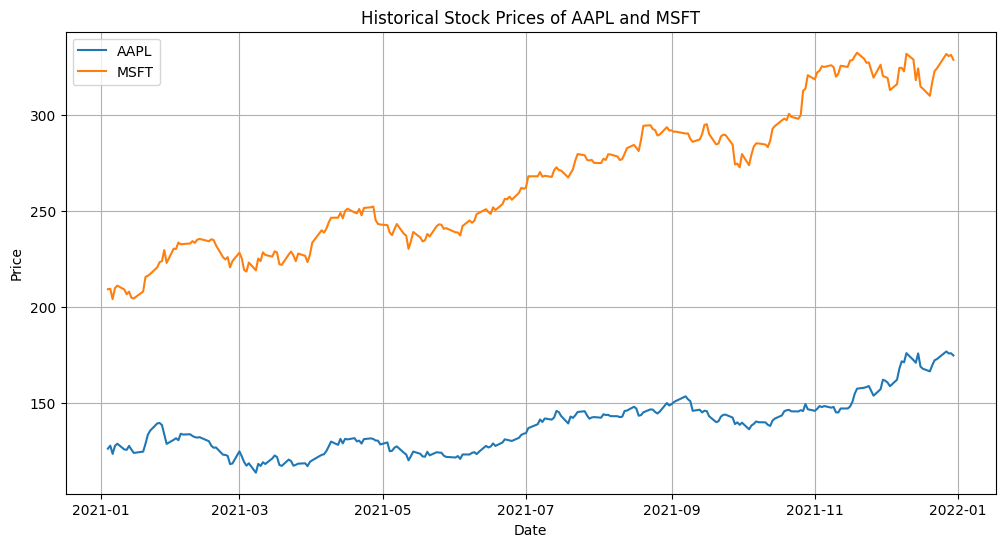

In [5]:
# Plot the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close']['AAPL'], label='AAPL')
plt.plot(data['Close']['MSFT'], label='MSFT')
plt.title('Historical Stock Prices of AAPL and MSFT')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

#### Pairs Trading Techniques
Pairs trading is a popular trading strategy that involves identifying pairs of assets that exhibit a high degree of correlation and trading them based on their relative price movements.

##### Cointegration Strategy
Cointegration is a statistical property that ensures the linear combination of two or more time series variables is stationary. In the context of pairs trading, cointegrated assets are those whose price movements tend to move together in the long run, even if they experience short-term divergences.

##### Correlation Strategy
The correlation strategy in pairs trading involves selecting pairs of assets that exhibit a high degree of correlation in their price movements. Traders can monitor the correlation coefficient between the assets and take positions based on the strength and direction of the correlation.

##### Mean Reversion Strategy
Mean reversion is a fundamental concept in pairs trading that suggests asset prices tend to revert to their historical averages over time. Traders employing mean reversion strategies identify pairs of assets that have drifted apart in price and take positions based on the expectation that the prices will converge back to their long-term relationship.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Download historical data
data = yf.download(['AAPL', 'MSFT'], period='1y')

# Feature engineering
data['AAPL_return'] = data['Close']['AAPL'].pct_change()
data['MSFT_return'] = data['Close']['MSFT'].pct_change()
data['Spread'] = data['AAPL_return'] - data['MSFT_return']

# Create the target variable
data['Signal'] = np.where(data['Spread'] > 0, 1, 0)

print(data.head())

# Prepare the data for machine learning
X = data[['AAPL_return', 'MSFT_return']]
y = data['Signal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of the Random Forest Classifier: {accuracy}')

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-08-23  225.789154  413.684235  227.162766  416.135830  223.290787   
2024-08-26  226.127594  410.408844  226.227137  414.170611  222.852841   
2024-08-27  226.973663  410.756256  227.789872  411.272370  223.848210   
2024-08-28  225.440796  407.540375  228.795180  411.907582  224.634535   
2024-08-29  228.725494  410.041626  231.841000  418.905077  227.819721   

Price                         Open                Volume            \
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT   
Date                                                                 
2024-08-23  409.019245  224.614628  413.872821  38677300  18493800   
2024-08-26  408.274871  225.709541  413.267388  30602200  13152800   
2024-08-27  407.193011  224.953068  409.783548  35934600 

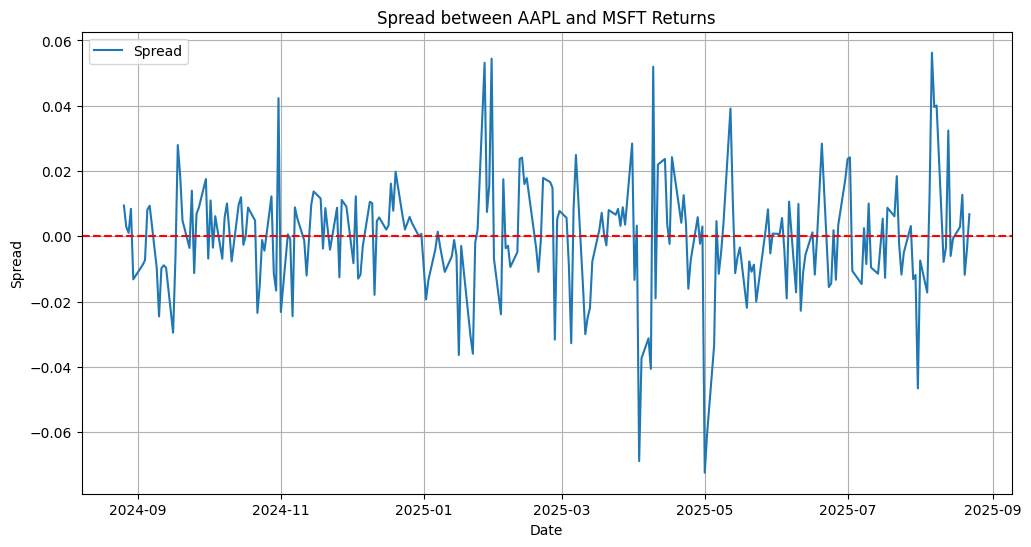

In [7]:
# Plot showing the spread
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Spread between AAPL and MSFT Returns')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid()

Statistical arbitrage models aim to capitalize on pricing discrepancies between related assets by taking trades based on statistical analysis and modeling.